###  Deep Neural Network using Keras
Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow.


1) Cat vs non-cat dataset!!

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import keras
import h5py

In [ ]:
# prepare your data
# 1(a) load data from .h5 file and convert to numpy array
# training set
train_dataset = h5py.File('datasets/cat-non-cat/train_catvnoncat.h5', "r")
train_x = np.array (train_dataset["train_set_x"][:])
train_y = np.array( train_dataset["train_set_y"][:])
# testing set
test_dataset = h5py.File('datasets/cat-non-cat/test_catvnoncat.h5', "r")
test_x = np.array (test_dataset["test_set_x"][:])
test_y = np.array( test_dataset["test_set_y"][:])
# class list
classes = np.array(test_dataset["list_classes"][:])

# fix random seed for reproducibility
np.random.seed(1)
print(train_x.shape)
n_inputs = train_x.shape[1] * train_x.shape[2] * train_x.shape[3]

#flatten
train_X= train_x.reshape(train_x.shape[0], -1)/255.
test_X= test_x.reshape(test_x.shape[0], -1)/255.

# warning: check dimensions and be sure of it!!!
print('classes are:', classes)
print('train_x:', train_X.shape)
print('train_y (training labels):', train_y.shape)

In [ ]:
# Building your model
model = Sequential()
#  recall your layers  (increase it accordingly as above and check what you get)
# 20 neurons in 1st hidden layer with input image length and we apply relu
model.add(Dense(20, input_dim=n_inputs, activation='relu'))
# 7 neurons in 2nd hidden layer with input image length and we apply relu
model.add(Dense(7, input_dim=20, activation='relu'))
# 5 neurons in 3rd hidden layer with input image length and we apply relu
model.add(Dense(5, input_dim=7, activation='relu'))
# 1 neuron at the output layer
model.add(Dense(1, input_dim=5, activation='sigmoid'))

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Other optimizers ==> SGD: Stochastic gradient descent optimizer or Adam or RMSprop or Adadelta. Check here (https://keras.io/optimizers/)

In [ ]:
# Fit the model
n_epochs = 150
batch_size = 2 # should depend on your data size, here we have very small size data with only 50 test samples and 209 train samples
split=0

# Case 0: split into 67% for train and 33% for test
if split:
    train_X, test_X, y_train, test_y = train_test_split(train_X, train_y, test_size=0.33, random_state=1)

# Case 1: using your own test data 
model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=n_epochs, batch_size=batch_size)

#### Predict from your sample



In [ ]:
def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        t1 = classes[int(p[index])].decode("utf-8")
        t2 = classes[y[0,index]].decode("utf-8")
        plt.title("Prediction: " + t1 + " \n Class: " + t2)
        
    return num_images

In [ ]:
# make a prediction
import matplotlib.pyplot as plt
%matplotlib inline 
index = 10
testImage = test_X[index]
test_image=testImage.reshape(64,64,3)
plt.imshow(test_image, interpolation='nearest')
#plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
tryImage = testImage.reshape(testImage.shape[0], -1)
ynew = model.predict_classes(testImage.reshape(testImage.shape[0], -1).T / 255.0)
print(ynew)
# show the inputs and predicted outputs
print("label=%s, Predicted=%s" % (test_y[index], ynew[0]))

###  Take a larger dataset

2) MNIST dataset

This dataset consists of 60,000 training images and 10,000 validation images with digits. 

The digit classes that you will need to identify will be 0-9 (i.e., 10 classes). This is multi-class classification problem.

We will also see how to see our loss is decreasing using tensorboard


In [3]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint

#### Data preparation and looking into it

In [4]:
data = np.load('datasets/MNIST_data/mnist.npz')
x_train= data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

# Note if this does not work then use below
# mnist = tf.keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

3
y = 3


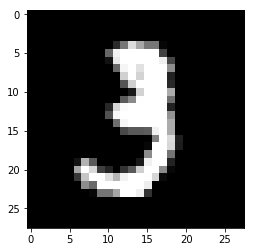

In [5]:
# reshape labels
trainY = y_train.reshape(1, y_train.shape[0])
testY = y_test.reshape((1, y_test.shape[0]))

# look into what images you have
# lets have a look at a cat/non cat picture inside our data
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
np.random.seed(1)

index = 10
print(trainY[0][index])

plt.imshow(x_train[index])
print ("y = " + str(trainY[0][index]))

#### Build you model

- Make 3 hidden layers with relu activation function
- Make 1 output function with softmax 
```python 
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return (e_x / e_x.sum())
```
- $\textbf{Softmax}$ function, or normalized exponential function is a generalization of the logistic function that "squashes" a K-dimensional vector z \mathbf {z}  of arbitrary real values to a K-dimensional vector $\sigma (\mathbf {z} ) $ of real values, for $K\geq 2$, where each entry is in the interval (0, 1), and all the entries add up to 1
 

#### Run your model

You will notice that if you iterate per sample (SGD) then it will be slow. You better process more samples together (batch processing with GD, also called as mini-batch gradient descent). However, depending upon your computational power you will need to adjust your batch size too.

In [6]:
# vectorize your inputs
x_train, x_test = x_train.reshape(x_train.shape[0], -1) / 255.0, x_test.reshape(x_test.shape[0], -1) / 255.0
n_inputs = x_train.shape[1]

In [7]:
# Building your model
model = Sequential()
#  recall your layers  (increase it accordingly as above and check what you get)
model.add(Dense(512, input_dim=n_inputs, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Compile model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Fit the model
# check your loss and accuracy using Tensorboard (see instructions below, if not sure ask your instructor)
from keras.callbacks import TensorBoard
from time import time

n_epochs = 50
batch_size = 128 
# change this and see for yourself
'''
saves the model weights after each epoch if the validation loss decreased
checkpointer = ModelCheckpoint(filepath='tmp/weights.hdf5', verbose=1, save_best_only=True)
'''
# look into your loss
tensorboard = TensorBoard(log_dir="tmp/{}".format(time()))
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=n_epochs, batch_size=batch_size,callbacks=[tensorboard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0012 - acc: 0.9996 - val_loss: 0.1086 - val_acc: 0.9832
Epoch 2/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.0073 - acc: 0.9978 - val_loss: 0.1210 - val_acc: 0.9793
Epoch 3/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.0020 - acc: 0.9993 - val_loss: 0.1140 - val_acc: 0.9821
Epoch 4/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0033 - acc: 0.9990 - val_loss: 0.1220 - val_acc: 0.9816
Epoch 5/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.0055 - acc: 0.9983 - val_loss: 0.1107 - val_acc: 0.9824
Epoch 6/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.0034 - acc: 0.9991 - val_loss: 0.1178 - val_acc: 0.9813
Epoch 7/50
60000/60000 [==============================] - 4s 63us/step - loss: 0.0029 - acc: 0.9989 - val_loss: 0.1173 - val_acc

#### See your loss at tensorboard

```shell
$tensorboard --logdir logs
```

http://127.0.0.1:6006

#### Try prediction!!! 

